In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [66]:
#!pip install xlrd==1.2.0 
# colab istedi normal jupyter de calisiyor aslinda

In [67]:
df=pd.read_excel("/content/drive/Othercomputers/My Laptop/0 Yaz Kampı/Day 5/Day 5 Students files/cars.xls")

In [68]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [69]:
x=df[["Price","Mileage","Cylinder"]]

In [70]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


Define, fit, predict

In [71]:
model=KMeans(n_clusters=4)

In [72]:
model=model.fit(x)

In [73]:
pred=model.predict(x)

In [74]:
pred

array([0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 2, 3,
       3, 2, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,

In [77]:
silhouette_score(x, pred)

0.4132257734701292

In [75]:
x["cluster"]=pred # yeni sütun ekleme \ diger bir yol assign komutu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,0
4,16339.170324,19832,6,3


Silhoutte values measure of how similar an object is to its own cluster compared to other clusters

In [78]:
clust = x.assign(Cluster=model.labels_) # x dataframe ine Cluster column olustur veriler model.labels_ gelsin demek ve bunu clust`a ata
clust

,Price,Mileage,Cylinder,cluster,Cluster
0,17314.103129,8221,6,0,0
1,17542.036083,9135,6,0,0
2,16218.847862,13196,6,0,0
3,16336.913140,16342,6,0,0
4,16339.170324,19832,6,3,3
...,...,...,...,...,...
799,16507.070267,16229,6,0,0
800,16175.957604,19095,6,3,3
801,15731.132897,20484,6,3,3
802,15118.893228,25979,6,3,3


In [79]:
model.cluster_centers_.astype("int") # her grubun kendi center ı var

array([[17971, 10137,     5],
       [42797, 12275,     7],
       [30308, 23641,     5],
       [15423, 24242,     5]])

In [92]:
model.cluster_centers_.astype("int")[:, 0]

array([17971, 42797, 30308, 15423])

In [80]:
model.labels_

array([0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 2, 3,
       3, 2, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,

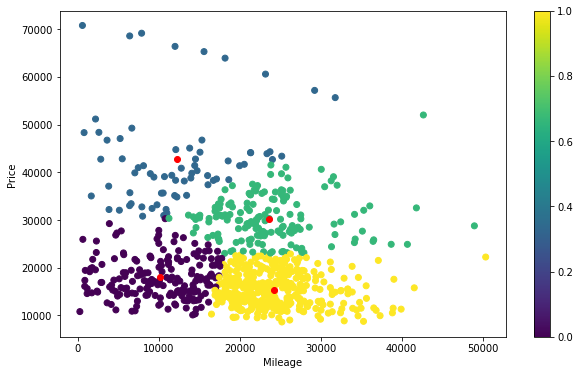

In [96]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage, x.Price, c=pred)
plt.scatter(model.cluster_centers_.astype("int")[:, 1], model.cluster_centers_.astype("int")[:, 0], c='r') # centers
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.colorbar()
plt.show()
# x ekseni mil, y ekseni fiyat 

In [82]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1, clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        # model=model.fit(x)
        pred=model.fit_predict(x) # fit ve predict aynı anda yapıyormuş
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print("Number of cluster = {}, silhoutte = {}, inertia = {}".format(no_of_cluster, score, model.inertia_))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)
# en son değişimde durucaz mesela bu örnekte 5 te durucaz

Number of cluster = 2, silhoutte = 0.45170118645871166, inertia = 77852350728.33255
Number of cluster = 3, silhoutte = 0.4132108747592501, inertia = 51790742335.09431
Number of cluster = 4, silhoutte = 0.4132861036846957, inertia = 40691986493.35622
Number of cluster = 5, silhoutte = 0.3547747365266213, inertia = 33555237566.925926
Number of cluster = 6, silhoutte = 0.3688589715903081, inertia = 28601083659.75923
Number of cluster = 7, silhoutte = 0.36039137792091674, inertia = 24584009849.859863
Number of cluster = 8, silhoutte = 0.3654900655054797, inertia = 21549774717.323082
Number of cluster = 9, silhoutte = 0.3489818725356875, inertia = 19204813919.91128
Number of cluster = 10, silhoutte = 0.3543569278625193, inertia = 17084653497.860546


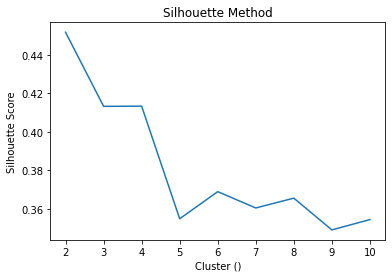

In [83]:
# Plotting the silhouette method
plt.plot(allclusters,allscore) # demek ki python da fonksiyonlar global etkiye sahip
plt.xlabel("Cluster ()")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

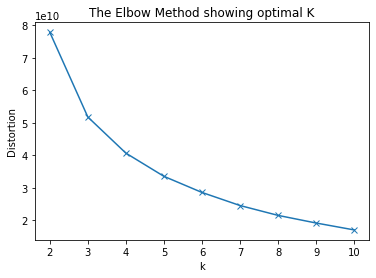

In [84]:
plt.plot(allclusters, sum_of_squared_distances, marker="x")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing optimal K")
plt.show() 